In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from utils import PlaceFields, get_coords, get_flanks, to_tensor, gaussian_grid
from scipy.stats import multivariate_normal

In [2]:
res = 400
coords = get_coords(res)
flanks = get_flanks(res + res // 10)

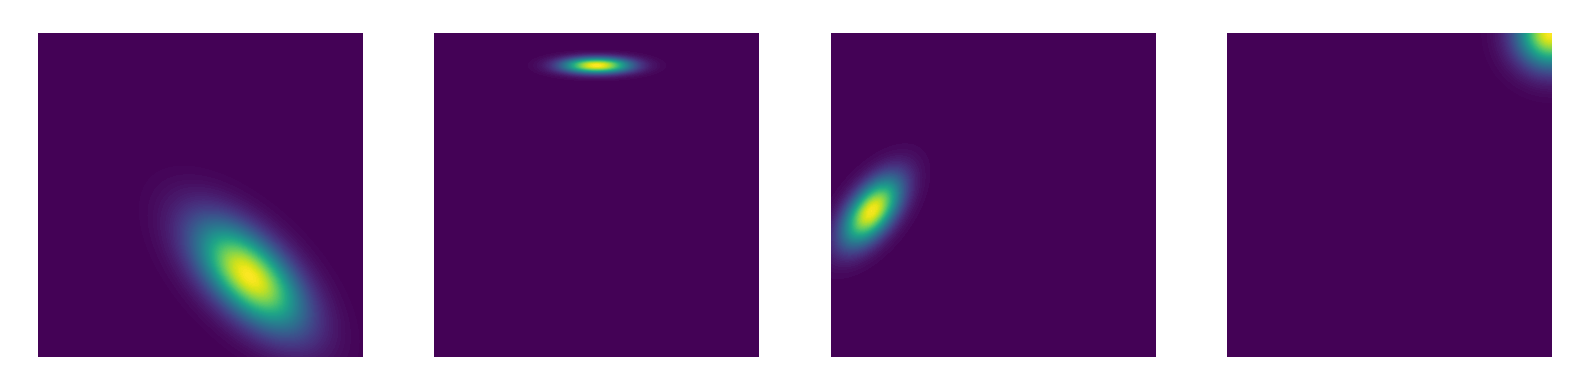

In [3]:
means = np.asarray([
    [0.3, -0.5],
    [0., 0.8],
    [-0.75, -0.1],
    [1, 1]
])
covs = np.asarray([
    [[0.05, -0.03],
     [-0.03, 0.05]],
    [[0.02, 0.],
     [0., 0.001]],
    [[0.015, 0.01],
     [0.01, 0.02]],
    [[0.02, 0.],
     [0., 0.02]]
])


targets = [gaussian_grid(coords.cpu(), [multivariate_normal(mean=m, cov=cov)]) for m, cov in zip(means, covs)]

for ax, target in zip(plt.subplots(1, 4, figsize=(16, 4))[1], targets):
    ax.contourf(target, levels=100)
    ax.axis('off')
    ax.axis('equal')
plt.tight_layout()
plt.show()

In [4]:
targets = to_tensor(np.asarray(targets))
pfs = PlaceFields(coords, flanks, len(targets))
pfs.add_targets(targets)
pfs.informed_init()
losses = pfs.fit()

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:58<00:00, 50.97it/s]


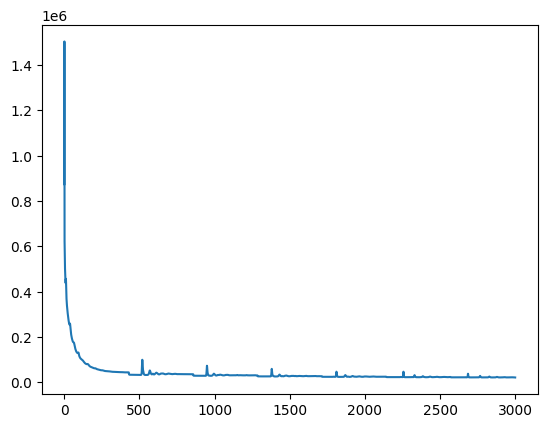

In [5]:
plt.plot(losses)

In [6]:
print("Prediction:")
print(pfs.means.data.cpu().numpy())
print("\nActual:")
print(means)

Prediction:
[[ 2.9520446e-01 -4.9290550e-01]
 [-1.4832120e-04  8.0023128e-01]
 [-7.4809361e-01 -9.8305829e-02]
 [ 9.2093569e-01  9.2092878e-01]]

Actual:
[[ 0.3  -0.5 ]
 [ 0.    0.8 ]
 [-0.75 -0.1 ]
 [ 1.    1.  ]]


In [7]:
print("Prediction:")
print(torch.inverse(pfs.get_cov_inv()).detach().cpu().numpy())
print("\nActual:")
print(covs)

Prediction:
[[[ 4.6302736e-02 -2.4080360e-02]
  [-2.4080360e-02  4.2179763e-02]]

 [[ 1.9995175e-02 -1.4858714e-06]
  [-1.4858715e-06  1.0000467e-03]]

 [[ 1.2760909e-02  3.9283950e-03]
  [ 3.9283950e-03  1.8348899e-02]]

 [[ 4.0342747e-03  1.8987957e-05]
  [ 1.8987959e-05  4.0343381e-03]]]

Actual:
[[[ 0.05  -0.03 ]
  [-0.03   0.05 ]]

 [[ 0.02   0.   ]
  [ 0.     0.001]]

 [[ 0.015  0.01 ]
  [ 0.01   0.02 ]]

 [[ 0.02   0.   ]
  [ 0.     0.02 ]]]


In [8]:
print(pfs.scales.data.cpu().numpy())

[[2.0252554]
 [5.964238 ]
 [3.2796094]
 [2.8367321]]


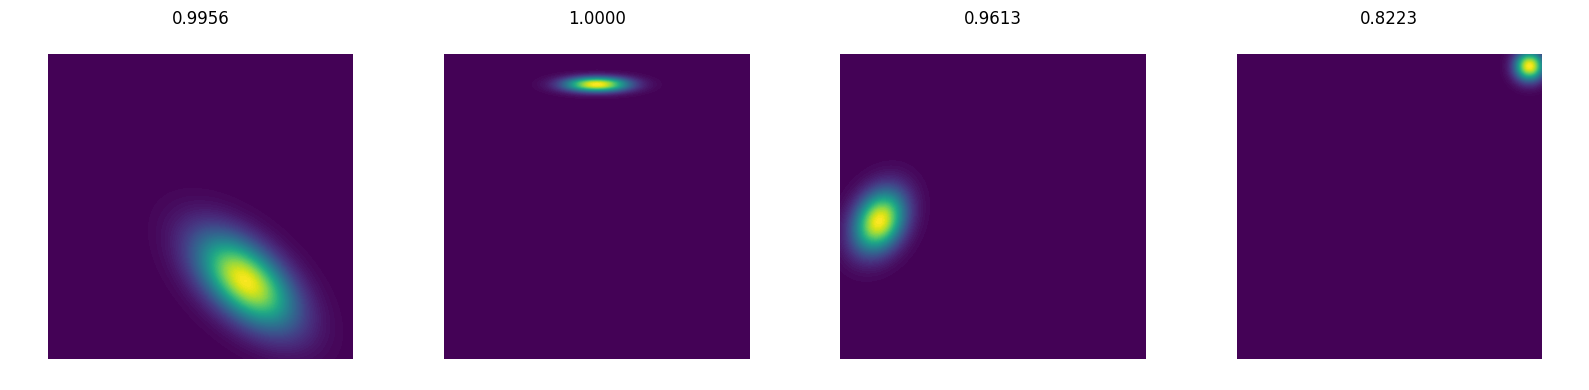

In [12]:
for ax, pred, fit in zip(plt.subplots(1, 4, figsize=(16, 4))[1],
                         pfs.predict().cpu().detach(),
                         pfs.calc_fitness()):
    ax.contourf(pred, levels=100)
    ax.set_title(f"{fit:.04f}")
    ax.axis('off')
    ax.axis('equal')
plt.tight_layout()
plt.show()